# **OCR-pytesseract (Arabic)**

In [1]:
import pandas as pd
import numpy as np

from PIL import Image
from PIL import Image, ImageDraw, ImageFont


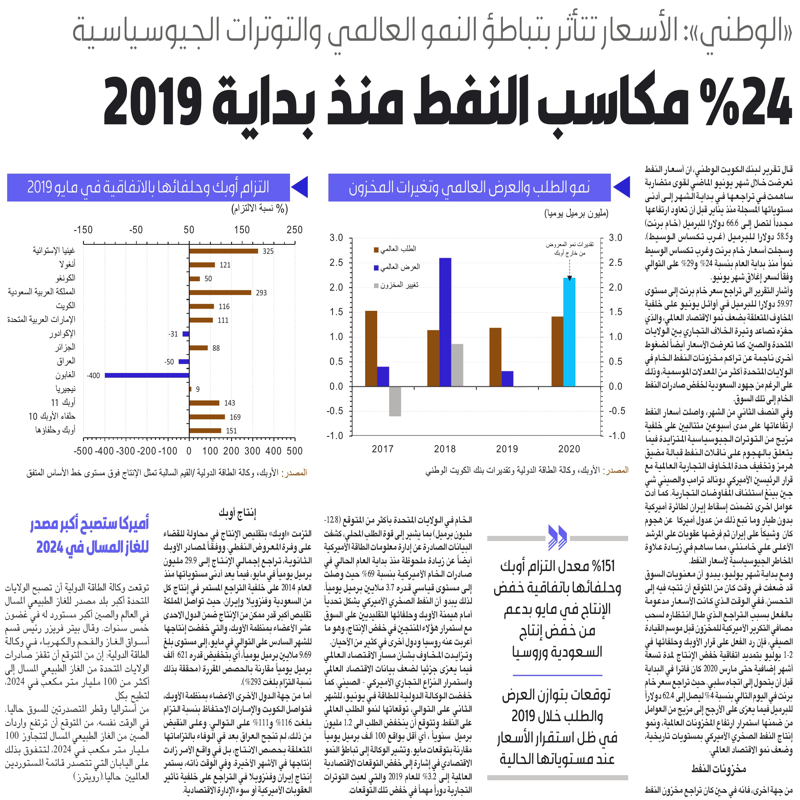

In [2]:
image = Image.open("/kaggle/input/imagesample/1.png")
image = image.convert("RGB")
new_image = image.resize((800, 800))
new_image

# OCR

In [3]:
import shutil
import os
import subprocess
from pdf2image import convert_from_path
from PIL import Image
import pytesseract

src = '../input/papers-images/ara.traineddata'
dest = '/usr/share/tesseract-ocr/4.00/tessdata/'
shutil.copy(src, dest)


src = '../input/papers-images/deu.traineddata'
dest = '/usr/share/tesseract-ocr/4.00/tessdata/'
shutil.copy(src, dest)

src = '../input/papers-images/fra.traineddata'
dest = '/usr/share/tesseract-ocr/4.00/tessdata/'
shutil.copy(src, dest)

filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames) # check that the file is added in this directory which was not present before.

['eng.traineddata', 'pdf.ttf', 'tessconfigs', 'configs', 'osd.traineddata', 'deu.traineddata', 'ara.traineddata', 'fra.traineddata']


# Functions

In [4]:
def ocr_extract(image):
    width, height = image.size
    w_scale = 2000/width
    h_scale = 2000/height

    ocr_df = pytesseract.image_to_data(image, output_type='data.frame', lang='ara+eng+fra+deu') \
    #text3 = pytesseract.image_to_string(image, lang='ara+eng' )


    ocr_df = ocr_df.dropna() \
                   .assign(left_scaled = ocr_df.left*w_scale,
                           width_scaled = ocr_df.width*w_scale,
                           top_scaled = ocr_df.top*h_scale,
                           height_scaled = ocr_df.height*h_scale,
                           right_scaled = lambda x: x.left_scaled + x.width_scaled,
                           bottom_scaled = lambda x: x.top_scaled + x.height_scaled)

    float_cols = ocr_df.select_dtypes('float').columns
    ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
    return ocr_df


## Arabic Text

In [5]:
image = Image.open("/kaggle/input/imagesample/1.png")
ocr_df=ocr_extract(image)
print(ocr_df.shape)
ocr_df.sample(50)

(696, 18)


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,left_scaled,width_scaled,top_scaled,height_scaled,right_scaled,bottom_scaled
485,5,1,16,1,7,1,344,586,16,30,68,يشكل,860,40,1465,75,900,1540
138,5,1,7,1,16,2,741,357,24,29,6,للتحدة,1852,60,892,72,1912,965
478,5,1,16,1,6,3,414,571,20,29,88,قياسي,1035,50,1428,72,1085,1500
168,5,1,7,1,20,5,645,412,18,29,10,2s‏,1612,45,1030,72,1658,1102
127,5,1,7,1,14,6,673,329,12,29,24,ايض,1682,30,822,72,1712,895
218,5,1,7,1,27,8,673,506,21,29,21,مركا,1682,52,1265,72,1735,1338
743,5,1,30,2,2,5,164,706,36,9,16,Pant‏,410,90,1765,22,500,1788
459,5,1,16,1,4,1,447,544,25,30,59,أبضاعن,1118,62,1360,75,1180,1435
839,5,1,32,1,6,3,85,655,9,5,92,من,212,22,1638,12,235,1650
524,5,1,16,1,14,2,378,692,71,12,22,الوكالةالدوليةللطاف,945,178,1730,30,1122,1760


In [6]:
print(' '.join(ocr_df['text'].tolist()))

«الوطني»: الأسعار   تتأ بتباطمُ النمو العالمي païlg‏   ت الجيوسياسية 1 مكاسب النفط منذ بداية 2019 قال تقرير لبت الكويت الوطني ان أسعار التقط تعرضت َال شهر بوني اناي لفوى ستضارية سامت في تراجعها في بدابةالشهرإدوادني مستوباتا للسجلة من بتر قب ان نعود تام" (Sip AS dbo al‏ و3 دوا للبرديل اغرب تكساس aig‏ وسجلت أسعا خام برنت وغرب تكساس الوسيط نوم يداي العام يسية 534 hy‏ على A‏ e ps‏ g 8 L‏ ee Jel 3807‏ t 0 d S‏ حل Seige gst iy aa‏ التحدة ولص كما تعرضت الإسعار ايض الضقوط أشرى تاجمة ع تراك مخزونات PASI‏ الوآيات للتحدة كثر م العدات الوسمية ولد على الرغوم جهود لسعودية لخفض صارات النقط deg‏ .وف النصف الثاني من الشهر واصلت لسع لنقط اإتفعاتهاعلى مدى أسبوعين تتانين 2s‏ مزيع م التوترت الجيوسياسية اليد فيا ينطق بالهجوم على ناذات التقط قيالة تضق رمز وتخفيف حدة الخاوف p‏ قار الرئيسي الأمبركي بوناد تراب والصيني شي اج بين استئناف الفاوضات التجارية كماات po a dy ge‏ يدون طيار وما تع ذلك من عدول مركا عزهجوم كان é V ù G‏ — h él p p‏ it Lal DA‏ اوس يداية شهر يولبو يبدو ان معتويات السوق قد ضعات في وقتكان م الت

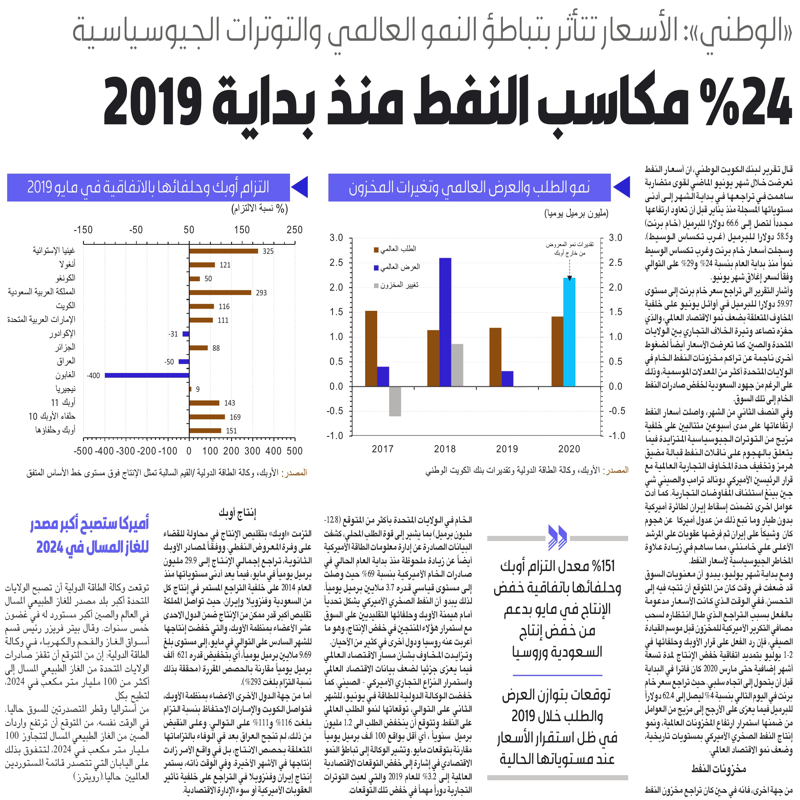

In [18]:
img = Image.open('/kaggle/input/imagesample/1.png')
img

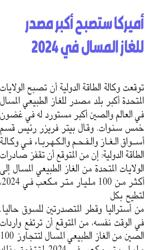

In [31]:
img = Image.open('/kaggle/input/imagesample/1.png')
box = (5, 500, 150, 750)
img2 = img.crop(box)

img2.save('myimage_cropped.jpg')

img = Image.open('/kaggle/working/myimage_cropped.jpg')
img

In [36]:
ocr_df=ocr_extract(img)
print(' '.join(ocr_df['text'].tolist()))
print('\n\n\n')
ocr_df

أميركااستصبح أكبر معدر للغاز المسال في 2024 A) pat Nay aa r في العالم ولص أكبر مستورد ل في فضون‎ خدس سنوات. وقال بيقر لوهذ رئيس سسا‎ وك‎ kır J d Bt Sd lage اب all go‏ آ! ,السال. ries iy‏    






,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,left_scaled,width_scaled,top_scaled,height_scaled,right_scaled,bottom_scaled
4,5,1,1,1,1,1,75,13,69,22,49,أميركااستصبح,1034,952,104,176,1986,280
5,5,1,1,1,1,2,51,9,24,33,79,أكبر,703,331,72,264,1034,336
6,5,1,1,1,1,3,25,9,25,33,56,معدر,345,345,72,264,690,336
8,5,1,1,1,2,1,115,27,30,36,82,للغاز,1586,414,216,288,2000,504
9,5,1,1,1,2,2,79,27,37,36,49,المسال,1090,510,216,288,1600,504
10,5,1,1,1,2,3,59,27,20,36,85,في,814,276,216,288,1090,504
11,5,1,1,1,2,4,25,27,33,36,85,2024,345,455,216,288,800,504
15,5,1,2,1,1,1,0,83,24,10,49,A),0,331,664,80,331,744
16,5,1,2,1,1,2,24,66,27,36,49,pat,331,372,528,288,703,816
17,5,1,2,1,1,3,60,83,84,11,30,Nay,828,1159,664,88,1986,752


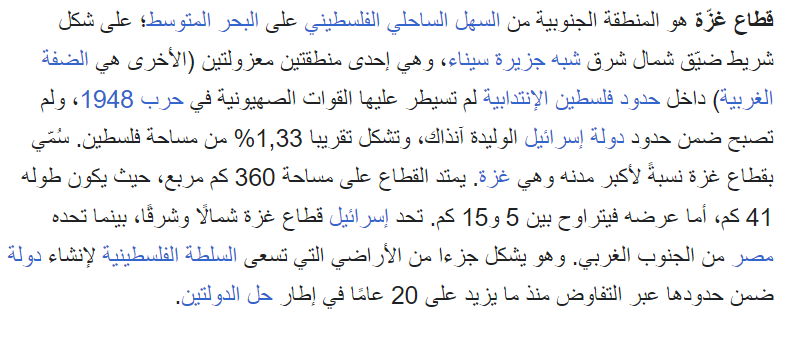

In [38]:
img = Image.open('/kaggle/input/imagesample/gaza.png')
img

In [39]:
ocr_df=ocr_extract(img)
print(' '.join(ocr_df['text'].tolist()))
print('\n\n\n')
ocr_df

قطاع 336 هو المنطقة الجنوبية من السهل الساحلي الفلسطيني على البحر المتوسط؛ على شكل شريط ضيّق شمال شرق شبه جزيرة سيناء؛ وهي إحدى منطقتين معزولتين (الأخرى هي الضفة الغربية) داخل حدود فلسطين الإنتدابية لم تسيطر عليها القوات الصهيونية في حرب 1948؛ ولم تصبح ضمن حدود دولة إسرائيل الوليدة آنذاك؛ وتشكل تقريبا 961,33 من مساحة فلسطين. مستي بقطاع غزة نسبة لأكبر مدنه وهي غزة. يمتد القطاع على مساحة 360 كم مربع؛ حيث يكون طوله 1 كم أما عرضه فيتراوح بين 5 و15 كم. تحد إسرائيل قطاع غزة by VE‏ بينما تحده مصر من الجنوب الغربي. وهو يشكل جزءا من الأراضي التي تسعى السلطة الفلسطينية لإنشاء دولة ضمن حدودها عبر التفاوض منذ ما يزيد على 20 عامًا في إطار حل الدولتين.






,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,left_scaled,width_scaled,top_scaled,height_scaled,right_scaled,bottom_scaled
4,5,1,1,1,1,1,734,10,39,25,93,قطاع,1837,98,59,148,1935,208
5,5,1,1,1,1,2,696,8,30,24,68,336,1742,75,47,142,1817,190
6,5,1,1,1,1,3,669,16,18,16,93,هو,1675,45,95,95,1720,190
7,5,1,1,1,1,4,604,10,55,16,92,المنطقة,1512,138,59,95,1650,154
8,5,1,1,1,1,5,529,10,67,22,93,الجنوبية,1324,168,59,131,1492,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,5,1,1,1,8,10,351,286,32,14,70,عامًا,879,80,1697,83,959,1780
126,5,1,1,1,8,11,323,286,21,23,93,في,809,53,1697,136,861,1834
127,5,1,1,1,8,12,283,285,32,21,92,إطار,708,80,1691,125,788,1816
128,5,1,1,1,8,13,248,285,25,19,93,حل,621,63,1691,113,683,1804


( معركة و الخليل بين رجال اللقساومة وقوة اسرائيلية حظر التجول قى المدينة بعد الايقاع بدورية أسرائيلية في كمين تل ابيب في 3١‏ وكالات الانباء م ومعتمساء الوم معركة بن رحال المقاومة وق اسزائيلية في مدينة الخليل المقدسة فى جنوبالضفة الغربية (« المحتله © النهر الإردن ثم yn a U d‏ . وقد بدات الممركة بعد ان اوقع aal‏ رجالالمقاومة دورية أسرائيلية تضم جنديين لى كمن فى احد الشوارع الضيقة فى حى القصبة القديمبالدينة , 355 تتل ‏ احدعما Nein gill le‏ اصيب ألثانى بجراح خطرة وسارعت تمزيزاتاسرائيلية الى مصدر الرصاص. ولكنها لم تستطع انقاذ الجندى الثاتى الذى كان gles‏ الاشتباك مع رجل المقاومة الذى استدرجالتعزيزات التي تتعقبه الى كمين آخر بدات بعده على الفور الممركة بين رجال القاومةوالقوة الاسرازقية 0 وقد أعلنت سلطات اسرائيل حظر التدول فىالمدينة وبدات تنتيش الحى القديم كله . وقال راديو لندن ان الاتستزاك وقع فى الوقت الذى كان فيه الجنرال حاييم بارليف رئيس اركان الجيشى الإسرائيلى يقدم تقريرا الى مجلس الوزراء الاسرائيلى عن الاستباك العنيف وقد quit‏ 5 تل آبيب أن tbat al baja‏ آخر مات آمس » وهو من بين خسائر اس

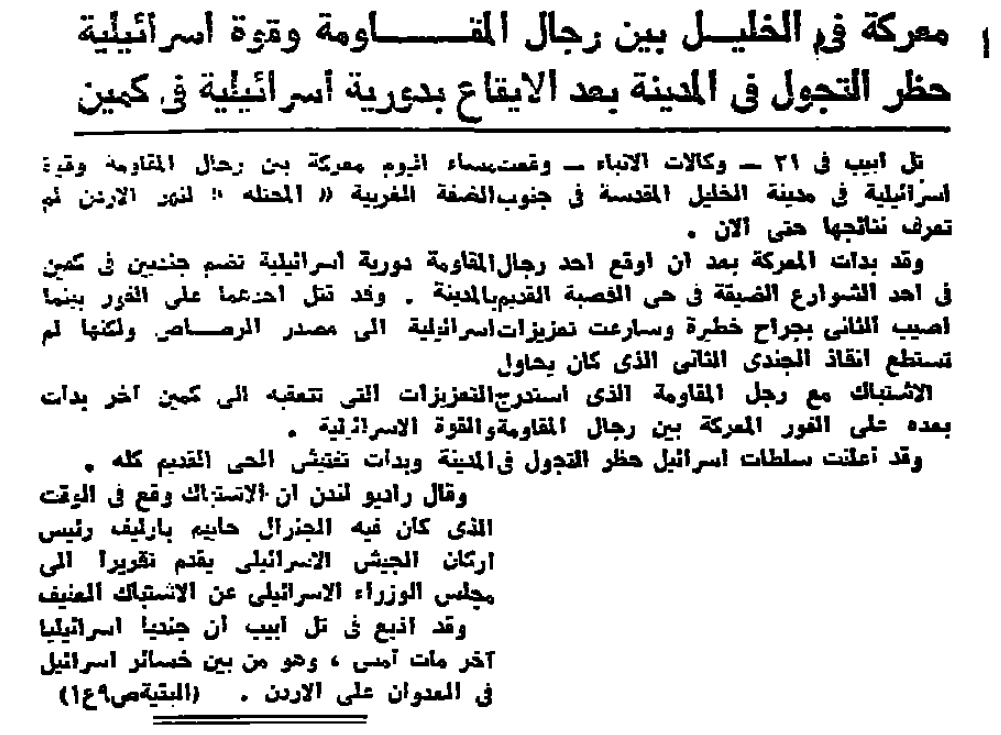

In [40]:
img = Image.open('/kaggle/input/imagesample/Khalil.png')
ocr_df=ocr_extract(img)
print(' '.join(ocr_df['text'].tolist()))
print('\n\n\n')
print(ocr_df.head())
img